# 다양한 분류 알고리즘

- multi classification
- logistic regression
- sigmooid function

## 랜덤박스 상품
- 내용물이 공개되지않은채로 구매자가 구매하는 상품. 내용물엔 판매금액보다 더 싸거나 더 비싼게 들어있다.
- 럭키백 구매를 유도하기 위해 각 상품내부에 무엇이 들어있을지 확률을 표기하려면 어떻게 해야할까?


In [28]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv')
fish.head()

print(f'생선의 종류들 {pd.unique(fish["Species"])} \n=> Y가 될 항목들')

X_fish = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
y_fish = fish["Species"].to_numpy()


# data set 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_fish, y_fish, random_state=42) 

# 데이터 표준화 전처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
train_scaled = ss.transform(X_train)
test_scaled = ss.transform(X_test)
print(f'StandardScaler 데이터 표준화 전처리 (값의 스케일이 달라서 생기는 오류를 없에기위해) \n  {X_train[:5, 0]} -> {train_scaled[:5, 0]}')

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, y_train)
print(kn.score(train_scaled, y_train))
print(kn.score(test_scaled, y_test))

# 
print(f'KNeighborsClassifier로 다중분류되어 정렬된 타깃값들: {kn.classes_}')

print(kn.predict(test_scaled[:5]))

생선의 종류들 ['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt'] 
=> Y가 될 항목들
StandardScaler 데이터 표준화 전처리 (값의 스케일이 달라서 생기는 오류를 없에기위해) 
  [720.  500.    7.5 110.  140. ] -> [ 0.91965782  0.30041219 -1.0858536  -0.79734143 -0.71289885]
0.8907563025210085
0.85
KNeighborsClassifier로 다중분류되어 정렬된 타깃값들: ['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


###  KNeighborsClassifier 의 예측 과정
1. predict_proba() 로 클래스별 확률을 측정함
2. 그중 가장 큰 확률값의 컬럼을 반환함

In [40]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4)) # 예측값에 대해 넷째자리까지 표시한다.

distances, indexes = kn.kneighbors(test_scaled[3:4])
print(f'{test_scaled[3:4][0]} <- 이 데이터의 이웃 클래스 3개는')
print(f'{indexes[0]} 이다. 해당 항목들에 대한 예측값들은 다음과 같다.')
print(f'{y_train[indexes][0]} Perch가 2개이므로. \n {test_scaled[3:4]} 데이터는 Perch일 확률이 67%이다.')
# 그런데 이런 방식으로는 표현 가능한 확률이 0/3, 1/3, 2/3, 3/3 뿐이다... -> 이웃의 갯수 n + 1개

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]
[-0.34698097 -0.23396068 -0.22320459 -0.11905019 -0.12233464] <- 이 데이터의 이웃 클래스 3개는
[104 115 106] 이다. 해당 항목들에 대한 예측값들은 다음과 같다.
['Roach' 'Perch' 'Perch'] Perch가 2개이므로. 
 [[-0.34698097 -0.23396068 -0.22320459 -0.11905019 -0.12233464]] 데이터는 Perch일 확률이 67%이다.


## 로지스틱 회귀 (logistic regression)
- 회귀는 보통 예측에 사용되지만, 이 알고리즘은 분류 모델이다.
- z = a * 'Weight' + b * 'Length' + c * 'Diagonal' + d * 'Height' + e * 'Width' + f
  - 여기서 z를 확률로 표현하기 위해 0~1 사이의 값을 만들어야한다.
  - 이때 사용되는 것이 시그모이드 함수 (=== 로지스틱함수) 이다.
  

### 로지스틱 회귀로 이진 분류

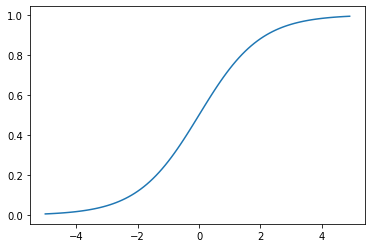

x 값이 큰 음수일 수록 0에 가까워지고 큰 양수일수록 1에 가까워진다.


In [46]:
import numpy as np
import matplotlib.pyplot as plt

print('시그모이드 함수 예시')
z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))
# print(phi)
plt.plot(z, phi)
plt.show()
print(f'x 값이 큰 음수일 수록 0에 가까워지고 큰 양수일수록 1에 가까워진다.')

In [70]:
bream_smelt_indexes = (y_train == 'Bream') | (y_train == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = y_train[bream_smelt_indexes]

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)
print(lr.predict(train_bream_smelt[:5]))
print('    음성클래스  |    양성클래스')
print(lr.classes_)
print(lr.predict_proba(train_bream_smelt[:5]))
print('모델의 계수들과 bias')
print(lr.coef_, lr.intercept_)

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']
    음성클래스  |    양성클래스
['Bream' 'Smelt']
[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]
모델의 계수들과 bias
[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


### 로지스틱 회귀로 다중 분류
- 기본적으로 반복적인 알고리즘을 사용함
  - max_iter (반복횟수 = 100)
- 릿지 회귀와 같이 계수의 제곱을 규제함 (L2 규제라고 부른다)
- 규제를 제어하는 매개변수는 C = 1 (릿지와 러쏘에서는 alpha) 

In [76]:
 lr = LogisticRegression(C=20, max_iter= 1000)
 lr.fit(train_scaled, y_train)
 print(lr.score(train_scaled, y_train))
 print(lr.score(test_scaled, y_test))

0.9327731092436975
0.925


In [125]:
proba = lr.predict_proba(test_scaled[:5])
print(f'y_test[:5]: {y_test[:5]}')
print(f'lr.classes_: {lr.classes_}')
print(f'np.round(proba, decimals=3): {np.round(proba, decimals=3)}')
print(f'lr.coef_.shape, lr.intercept_.shape: {lr.coef_.shape, lr.intercept_.shape}')
# 행의 갯수만큼 이진 분류에서 보았던 z을 계산한다.
# 다중 분류는 소프트맥스 함수를 이용해 7개의 z값을 확률로 계산한다.

result = np.round(proba, decimals=3)

for i, item in enumerate(y_test[:5]):
  my_predict = list(result[i])
  answer = my_predict.index(max(my_predict))
  print(item, lr.classes_[answer], 'O' if item == lr.classes_[answer] else 'X')

y_test[:5]: ['Perch' 'Smelt' 'Pike' 'Whitefish' 'Perch']
lr.classes_: ['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
np.round(proba, decimals=3): [[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
lr.coef_.shape, lr.intercept_.shape: ((7, 5), (7,))
Perch Perch O
Smelt Smelt O
Pike Pike O
Whitefish Roach X
Perch Perch O


In [124]:
# softmax ??
# 여러개의 선형 방정식의 출력값을 0~1 사이로 압축, 전체 합이 1이 되도록 만든다. 이를 위해 지수 함수를 사용한다. 정규화된 지수 함수라고 불리기도한다.
decision = lr.decision_function(test_scaled[:5])
_decision = np.round(decision, decimals=2)
print(_decision)
for row in _decision:
  print(row, '다 더하면 0 나옴')
print('로지스틱 회귀함수 생김새를 생각해보자 \n ')


from scipy.special import softmax

proba = softmax(decision, axis=1) # axis 1 각 행마다 소프트맥스 계산, 
_proba = np.round(proba, decimals=3)
print(_proba)

for row in _proba:
  print(row, '다 더하면 1 나옴 : ', row.sum())
print('n개에 대해서 각각의 확률을 더하면 1이 나올수밖에 없으니까 \n')

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]
[-6.5   1.03  5.16 -2.73  3.34  0.33 -0.63] 다 더하면 0 나옴
[-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26] 다 더하면 0 나옴
[-4.34 -6.23  3.17  6.49  2.36  2.42 -3.87] 다 더하면 0 나옴
[-0.68  0.45  2.65 -1.19  3.26 -5.75  1.26] 다 더하면 0 나옴
[-6.4  -1.99  5.82 -0.11  3.5  -0.11 -0.71] 다 더하면 0 나옴
로지스틱 회귀함수 생김새를 생각해보자 
 
[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
[0.    0.014 0.841 0.    0.136 0.007 0.003] 다 더하면 1 나옴 :  1.001
[0.    0.003 0.044 0.    0.007 0.946 0.   ] 다 더하면 1 나옴 :  1.0
[0.    0.    0.034 0.935 0.015 0.016 0.   ] 다 더하면 1 나옴 :  1.0
[0.011 0.034 0.306 